In [1]:
#import functions
import numpy as np
from numpy import linalg

import cv2 as cv
import scipy
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
import shutil

from utils import resize_percent, edge_detect, count_gray_levels, fill
# from utils import show_image

In [2]:
#cross correlation function

def cross_correlation (frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=False):
    image_1_name = os.fsdecode(os.listdir(path_to_images)[0])
    image_1 = cv.imread(path_to_images + f'{image_1_name}', cv.IMREAD_GRAYSCALE)
    corr_full_x = np.zeros([image_1.shape[1], frNum])
    corr_full_y = np.zeros([image_1.shape[0], frNum])
    k=0
    while k<frNum:
        image_name = str(k) + '.jpg'
        image_next = cv.imread(path_to_images+f'{image_name}', cv.IMREAD_GRAYSCALE)
        if x_disp:
            arr_1 = np.ones([kernel,]) * image_1[pixel[0], pixel[1]]
            corr = signal.correlate(image_next[pixel[0], :], arr_1, mode='same')
            corr = np.reshape(cv.normalize(corr, None, 1, 256, cv.NORM_MINMAX), (image_1.shape[1],)) #normalization added
            corr_full_x[:, k] = corr
        if y_disp:
            arr_1 = np.ones([kernel,]) * image_1[pixel[0], pixel[1]]
            corr = signal.correlate(image_next[:, pixel[1]], np.transpose(arr_1), mode='same')
            corr = np.reshape(cv.normalize(corr, None, 1, 256, cv.NORM_MINMAX), (image_1.shape[0],)) #normalization added
            corr_full_y[:, k] = corr          
        k+=1
    
    return corr_full_x, corr_full_y

In [3]:
'''Cropping the images''' 

'- data_path: path to the folder with the images to crop'
'- data_save: path to the folder to save the cropped images'
'- x_start: a starting x coordinate to crop an image'
'- x_end: an ending x coordinate to crop an image'
'- y_start: a starting y coordinate to crop an image'
'- y_end: an ending y coordinate to crop an image'
'- color: indicate if the images to crop are colored'

def crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False):
    for image in os.listdir(data_path):
        image_name = os.fsdecode(image)
        if color:
            img_next = cv.imread(data_path+f'{image_name}', cv.IMREAD_COLOR)
            cropped_img = img_next[x_start : x_end, y_start : y_end, :]
            cv.imwrite(data_save + f'{image_name}', cropped_img)
        else:
            img_next = cv.imread(data_path+f'{image_name}', cv.IMREAD_GRAYSCALE)
            cropped_img = img_next[x_start : x_end, y_start : y_end]
            cv.imwrite(data_save + f'{image_name}', cropped_img)

In [4]:
# #ONLY RUN ONCE
# #making folders
os.mkdir('sim_G600_1000Hz')
os.mkdir('sim_G600_1000Hz_crop')

In [6]:
# #ONLY RUN ONCE
# #extracting frames from the video
video_name = 'sim_G600_1000Hz_cut'
path_to_source = 'data/' + video_name + '.avi'
cap = cv.VideoCapture(path_to_source)
num_frames = 30
l=0
m=0
while l <= num_frames:
    ret, frame = cap.read()
    if not ret: 
        print('No frames grabbed!')
        break
    cv.imwrite(f'sim_G600_1000Hz/{m}.jpg', frame)
    l+=1
    m+=1

[ WARN:0@95.325] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@95.325] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'




No frames grabbed!


In [7]:
data_path = 'sim_G600_1000Hz/'
files_in_directory = os.listdir(data_path)
images = [file for file in files_in_directory if file.endswith(('jpg', 'png', 'jpeg', 'tiff', 'bmp', 'gif'))]
if not images:
    print("No images found in the directory.")
first_image_file = images[0]
img = cv.imread(os.path.join(data_path, first_image_file))
img.shape[:2]

(136, 134)

In [13]:
# #ONLY RUN ONCE
# # crop images for faster calculation 
data_path = 'sim_G600_1000Hz/'
data_save = 'sim_G600_1000Hz_crop/'
x_start = 0
x_end = 100
y_start = 0
y_end = 100
crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False)

[  1.           1.           1.           1.          12.08695652
  12.08695652  12.08695652  23.17391304  12.08695652  12.08695652
  23.17391304  34.26086957  34.26086957  45.34782609  45.34782609
  45.34782609  67.52173913  67.52173913  67.52173913  67.52173913
  78.60869565  78.60869565  78.60869565  89.69565217 100.7826087
 100.7826087  100.7826087  111.86956522 111.86956522 122.95652174
 122.95652174 122.95652174 145.13043478 145.13043478 145.13043478
 156.2173913  156.2173913  167.30434783 167.30434783 167.30434783
 167.30434783 167.30434783 167.30434783 178.39130435 178.39130435
 189.47826087 189.47826087 189.47826087 200.56521739 200.56521739
 200.56521739 211.65217391 211.65217391 222.73913043 222.73913043
 222.73913043 222.73913043 222.73913043 222.73913043 233.82608696
 233.82608696 244.91304348 244.91304348 244.91304348 244.91304348
 244.91304348 244.91304348 244.91304348 244.91304348 244.91304348
 244.91304348 244.91304348 256.         256.         256.
 256.         256. 

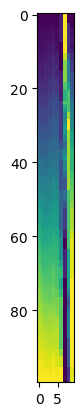

In [16]:
# implement slope measurement for one pixel
# 100x100 pixels
#iterate through each pixel to get a correlation result
frNum = 10
path_to_images = 'sim_G600_1000Hz_crop/'
# path_to_images = 'sim_1perc_crop/'
# path_to_images = 'sim_05perc_crop/'
# path_to_images = 'exp_2perc_crop/'
kernel = 1
threshold_bin = 0

pixel_x = 20
pixel_y = 10
pixel_array = []
for x in range(0, pixel_x + 1):
     for y in range(0, pixel_y + 1):
        pixel = [pixel_x, pixel_y]
pixel_array.append(pixel)         
         
#corr_full_y is 100x29 matrix which represents one pixel      
_, corr_full_y = cross_correlation(frNum, path_to_images, pixel_array[0], kernel, x_disp=False, y_disp=True)

plt.imshow(corr_full_y)
# print(corr_full_y.shape[1])
print(corr_full_y[:,-1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


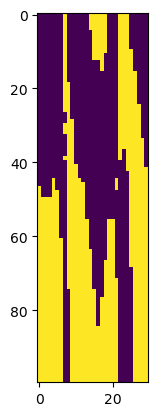

In [15]:
#clean version
T=120
image = np.copy(corr_full_y)
image[corr_full_y<T] = 0
image[corr_full_y>=T] = 1
plt.imshow(image)
print(image)

In [23]:
non0_firstCol = np.argwhere(image[:,0]==1)
zero_lastCol = np.argwhere(image[:,-1]==0)
print(non0_firstCol[0])
print(zero_lastCol[-1])
slope = (zero_lastCol[-1] - non0_firstCol[0])/frNum
print(slope)


[18]
[49]
[3.1]


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43304818e-03
  5.84386308e-02 3.00474860e-01 6.99525140e-01 9.41561369e-01
  9.95566952e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43304818e-03
  5.84386308e-02 3.00474860e-01 6.99525140e-01 9.41561369e-01
  9.95566952e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43304818e-03
  5.84386308e-02 3.00474860e-01 6.99525140e-01 9.41561369e-01
  9.95566952e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.41339626e-03
  5.81992214e-02 2.99401902e-01 6.97756131e-01 9.40488411e-01
  9.95327542e-01 9.99960696e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.17398691e-03
  5.52826185e-02 2.86330594e-01 6.76205188e-01 9.27417103e-01
  9.92410940e-01 9.99481877e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.10102864e-03
  4.22113109e-02 2.27749058e-01 5.79620563e-01 8.68835567e-01
  9.79339632e-01 9.97335961e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.33201953e

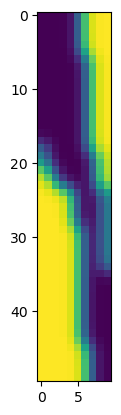

In [24]:
img = image.copy()
img_bl = cv.GaussianBlur(src=img, ksize=(7, 7), sigmaX=1)
plt.imshow(img_bl)
print(img_bl)

In [5]:
# Save the Numpy array as Image
image_filename = "image0_2perc.jpeg"
i=0
saved_image = plt.imsave(fname=image_filename, arr=image)

In [ ]:
img = cv.imread(filename=image_filename, flags=cv.IMREAD_GRAYSCALE)
plt.imshow(image)
print(image)

3.957000305750898


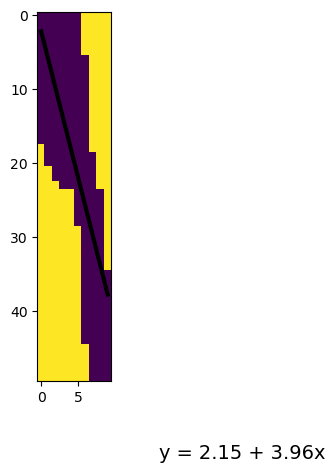

In [25]:
#example: fitting a line to cross correlation clean version from above (flipped)
plt.imshow(image)
#finding where the value is zero in the image matrix and filling that region with scatter points
zero_coords = np.argwhere(image==0)
# plt.xlim(0,10)
# plt.ylim(0,80)
# plt.scatter(zero_coords[:,1],zero_coords[:,0], color='purple')

#find line of best fit for scatter
slope, b = np.polyfit(zero_coords[:,1], zero_coords[:,0], 1)
if slope<0:
    zero_coords = np.argwhere(image==1)
    slope, b = np.polyfit(zero_coords[:,1], zero_coords[:,0], 1)
else:
    slope = slope


#add line of best fit to plot
plt.plot(zero_coords[:,1], slope*zero_coords[:,1]+b, color='black', linestyle='-', linewidth=3)

#add fitted regression equation to plot
plt.text(16, 60, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(slope) + 'x', size=14)
print(slope)